In [261]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

## Question 2

### HELP for TA:


1. Please ensure that the file is in the same directory as HW2 folder to enable loading of the image or just modify the path in main() if it is not.
<br>
2. Run all the cells in order for the algorithm to work.
<br>
3. The report is outputted once the code is run.

In [262]:
# Initialize centroids randomly from data points
def initialize_centroids(data, k):
    # Randomly select k unique data points as initial centroids
    random_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[random_indices]
    return centroids

In [263]:
# Assign data points to the nearest centroid
def assign_clusters(data, centroids):
    distances = np.sum((data[:, np.newaxis, :] - centroids) ** 2, axis=2)
    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels

In [264]:
# Update centroids based on the assigned data points
def update_centroids(data, cluster_labels, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_data = data[cluster_labels == i]
        if len(cluster_data) > 0:
            centroids[i] = np.mean(cluster_data, axis=0)
    return centroids

In [265]:
# Perform k-means clustering on the given data
def kmeans_clustering(data, k):
    centroids = initialize_centroids(data, k)
    prev_cluster_labels = np.zeros(data.shape[0])
    cluster_labels = assign_clusters(data, centroids)

    while not np.array_equal(cluster_labels, prev_cluster_labels):
        centroids = update_centroids(data, cluster_labels, k)
        prev_cluster_labels = cluster_labels
        cluster_labels = assign_clusters(data, centroids)

    return cluster_labels, centroids

In [266]:
# Visualize the clustered image using the centroids
def visualize_clusters(data, clusters, centroids, image_shape):
    newdata = centroids[clusters]
    newdata = newdata.reshape(image_shape)
    plt.imshow(newdata.astype(np.uint8))
    plt.axis('off')
    plt.show()

In [267]:
# Calculate and print the cluster report
def calculate_cluster_report(cluster_labels, centroids, k):
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    num_pixels_per_cluster = np.zeros(k)
    num_pixels_per_cluster[unique_labels] = counts
    
    print("\nCluster Report:")
    print(f"Number of clusters: {k}\n")
    print("Final centroids:")
    print(centroids)
    print("________________________________")

    max_count = np.max(counts)
    bar_width = 40

    for i in range(k):
        cluster_data = num_pixels_per_cluster[i]
        cluster_percentage = (cluster_data / len(cluster_labels)) * 100
        bar_length = int((cluster_data / max_count) * bar_width)

        print(f"Cluster {i+1}:")
        print(f"{cluster_data} pixels ({cluster_percentage:.2f}%)")

    print("________________________________\n")

    return num_pixels_per_cluster

In [268]:
# Plot the cost of clustering for different values of k
def plot_cost(costs, k_values):
    plt.plot(k_values, costs, marker='o', color='purple', linewidth=2)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Cost")
    plt.title("Cost of Clustering as a function of k")
    
    plt.grid(color='lightgray')

    plt.show()

In [269]:
# Load the image and reshape it into a 2D array
def load_image(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    image_shape = image_array.shape
    data = image_array.reshape((-1, 3))
    return data, image_shape

In [270]:
# Perform k-means clustering on the image with multiple values of k
def kmeans_image_clustering(image_path, k_values):
    data, image_shape = load_image(image_path)
    costs = []

    for k in k_values:
        cluster_labels, centroids = kmeans_clustering(data, k)
        visualize_clusters(data, cluster_labels, centroids, image_shape)
        num_pixels_per_cluster = calculate_cluster_report(cluster_labels, centroids, k)
        num_clusters = np.count_nonzero(num_pixels_per_cluster)

        cost = np.sum(np.min(np.sum((data[:, np.newaxis] - centroids) ** 2, axis=2), axis=1))
        costs.append(cost)

    plot_cost(costs, k_values)

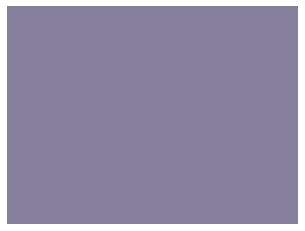


Cluster Report:
Number of clusters: 1

Final centroids:
[[133 127 155]]
________________________________
Cluster 1:
46750.0 pixels (100.00%)
________________________________



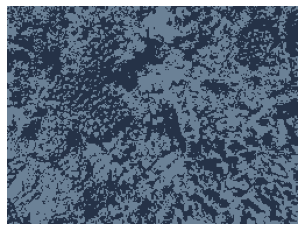


Cluster Report:
Number of clusters: 2

Final centroids:
[[ 37.34340188  50.39879354  71.681564  ]
 [107.35063855 129.59195474 150.06476975]]
________________________________
Cluster 1:
22711.0 pixels (48.58%)
Cluster 2:
24039.0 pixels (51.42%)
________________________________



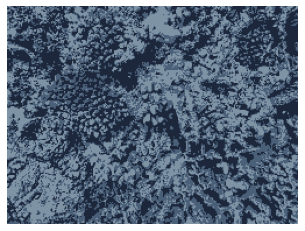


Cluster Report:
Number of clusters: 3

Final centroids:
[[126.43443045 147.84986378 164.74729401]
 [ 28.23155325  39.63790052  59.96814159]
 [ 74.41777884  95.47497617 120.07602479]]
________________________________
Cluster 1:
13581.0 pixels (29.05%)
Cluster 2:
16385.0 pixels (35.05%)
Cluster 3:
16784.0 pixels (35.90%)
________________________________



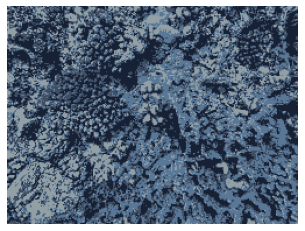


Cluster Report:
Number of clusters: 4

Final centroids:
[[146.93486935 159.04878363 165.36710001]
 [ 23.08816545  33.9842972   54.11926465]
 [ 63.79483259  78.63400092  99.61924782]
 [ 89.62869822 120.8239645  151.11211461]]
________________________________
Cluster 1:
7769.0 pixels (16.62%)
Cluster 2:
13055.0 pixels (27.93%)
Cluster 3:
13082.0 pixels (27.98%)
Cluster 4:
12844.0 pixels (27.47%)
________________________________



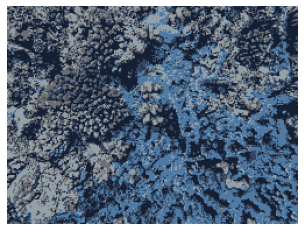


Cluster Report:
Number of clusters: 5

Final centroids:
[[110.2369382  110.98286517 113.47837079]
 [148.19977153 161.11423676 169.12523204]
 [ 53.07785317  71.50095685  96.98164579]
 [ 78.88078691 122.28461456 163.10638298]
 [ 21.90719986  31.89709628  51.16165733]]
________________________________
Cluster 1:
7120.0 pixels (15.23%)
Cluster 2:
7003.0 pixels (14.98%)
Cluster 3:
11496.0 pixels (24.59%)
Cluster 4:
9353.0 pixels (20.01%)
Cluster 5:
11778.0 pixels (25.19%)
________________________________



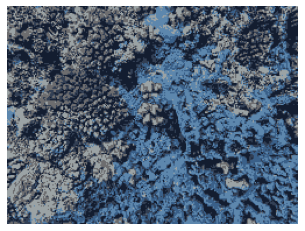


Cluster Report:
Number of clusters: 6

Final centroids:
[[155.98170303 163.42294159 165.31351161]
 [ 19.10142349  29.04102412  48.42931989]
 [109.51969166 109.54674142 111.94702172]
 [ 93.92939879 135.95187534 173.97062879]
 [ 58.21374508  96.70587345 137.28292461]
 [ 50.38857085  63.35392186  84.21673195]]
________________________________
Cluster 1:
5684.0 pixels (12.16%)
Cluster 2:
10116.0 pixels (21.64%)
Cluster 3:
7135.0 pixels (15.26%)
Cluster 4:
7252.0 pixels (15.51%)
Cluster 5:
6606.0 pixels (14.13%)
Cluster 6:
9957.0 pixels (21.30%)
________________________________



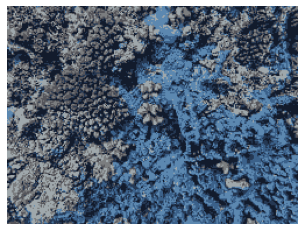


Cluster Report:
Number of clusters: 7

Final centroids:
[[ 18.91628857  27.12885662  44.59063067]
 [ 59.23759556  97.99265477 138.64413131]
 [ 37.4790391   56.13071126  83.52472916]
 [159.65644444 168.67177778 172.13777778]
 [123.81544092 125.8680725  127.21279191]
 [ 85.42544229  85.29216512  91.08963774]
 [ 92.84464989 136.83934526 176.24810549]]
________________________________
Cluster 1:
8816.0 pixels (18.86%)
Cluster 2:
6671.0 pixels (14.27%)
Cluster 3:
8492.0 pixels (18.16%)
Cluster 4:
4500.0 pixels (9.63%)
Cluster 5:
5738.0 pixels (12.27%)
Cluster 6:
5935.0 pixels (12.70%)
Cluster 7:
6598.0 pixels (14.11%)
________________________________



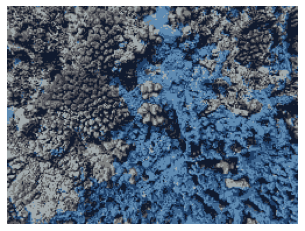


Cluster Report:
Number of clusters: 8

Final centroids:
[[ 95.91887702 139.78418877 178.81863589]
 [ 90.58540832  91.56172732  98.13773289]
 [ 53.88051806  56.32068588  66.43597227]
 [ 64.41474654 104.61051962 145.44017162]
 [161.87190287 170.62264618 173.58201189]
 [ 31.71651786  63.54910714 103.31305804]
 [127.68585896 130.05326332 130.89722431]
 [ 16.83851647  26.68290716  46.08984105]]
________________________________
Cluster 1:
5806.0 pixels (12.42%)
Cluster 2:
5743.0 pixels (12.28%)
Cluster 3:
5482.0 pixels (11.73%)
Cluster 4:
6293.0 pixels (13.46%)
Cluster 5:
4036.0 pixels (8.63%)
Cluster 6:
5376.0 pixels (11.50%)
Cluster 7:
5332.0 pixels (11.41%)
Cluster 8:
8682.0 pixels (18.57%)
________________________________



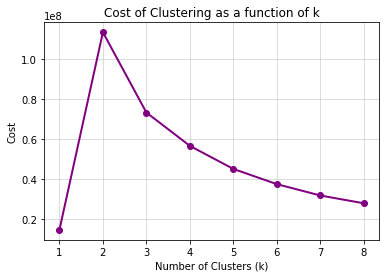

In [271]:
# Main function
def main():
    image_path = "2/hw2_img.jpg"
    k_values = range(1, 9)
    kmeans_image_clustering(image_path, k_values)

if __name__ == '__main__':
    main()